# Nripesh Kumar

## GRIP Task 4: To explore Decision Tree Algorithm

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12) 
# 70% of dataset used for training and 30% used for testing

In [3]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=12)
model = clf.fit(X_train, y_train)

### Textual representation of the Decision Tree(similar to if-else constructs in many languages)

In [4]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_1 <= 3.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.05
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



### Visual representation of the Decision Tree

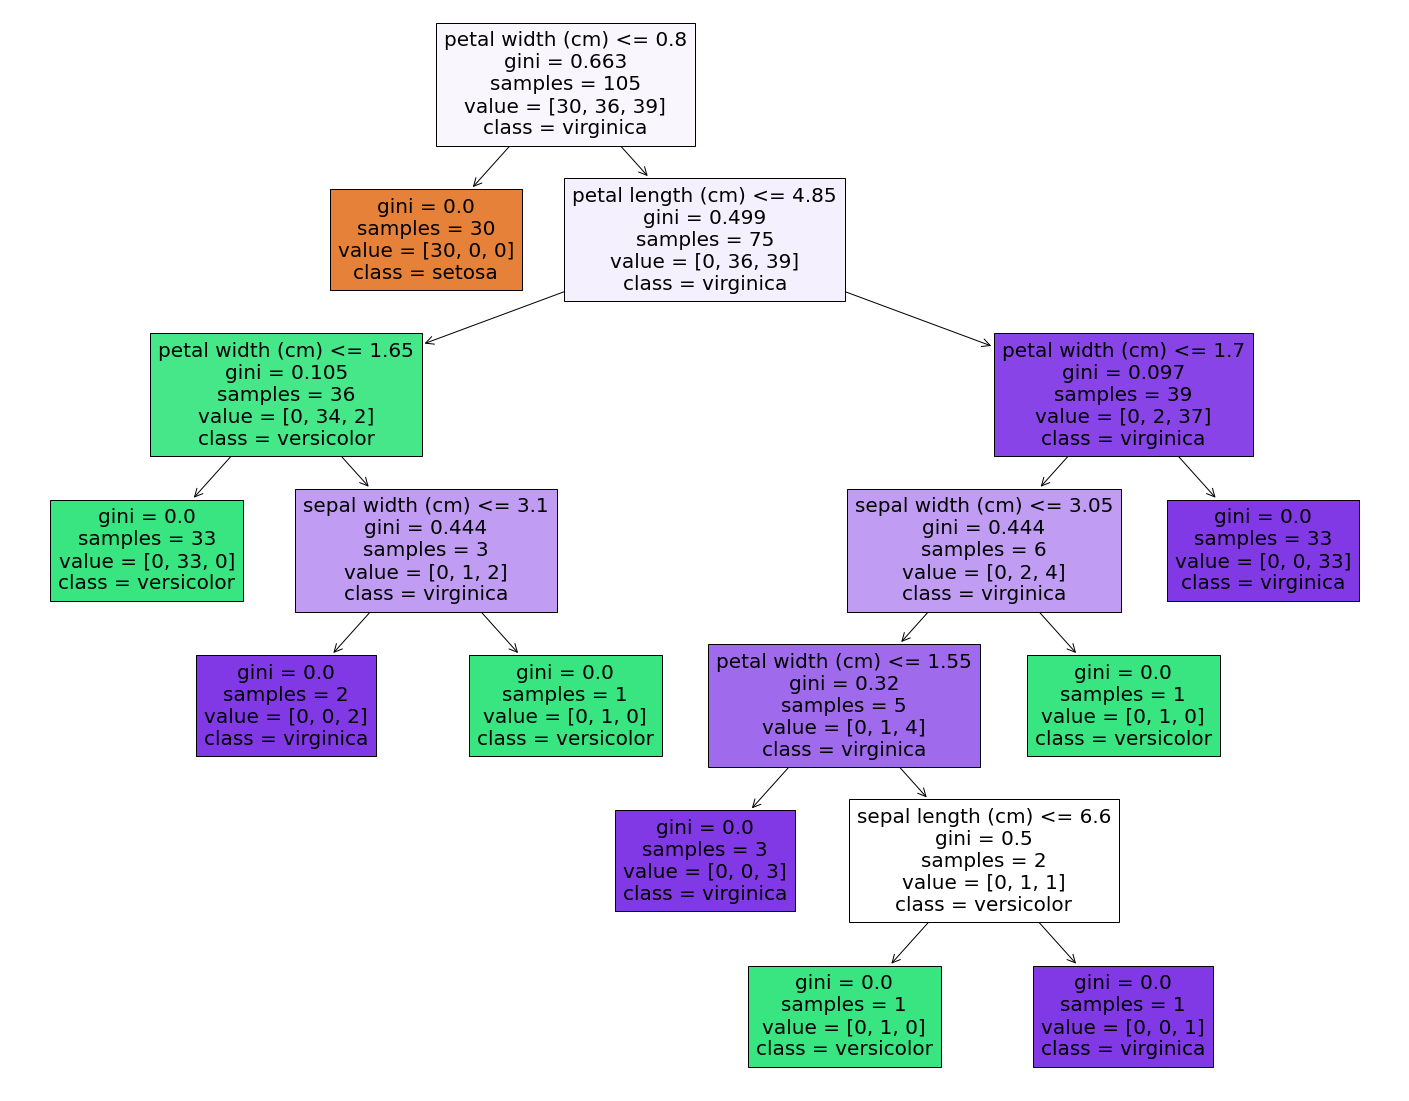

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Using trained model to calculate accuracy

In [6]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9555555555555556

### Using Random Forest Classifier(Ensemble of Decision Tree Models)

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=20,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Listing out the randomly generated Decision Trees

In [8]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

### Randomly plotting one of the constructed trees

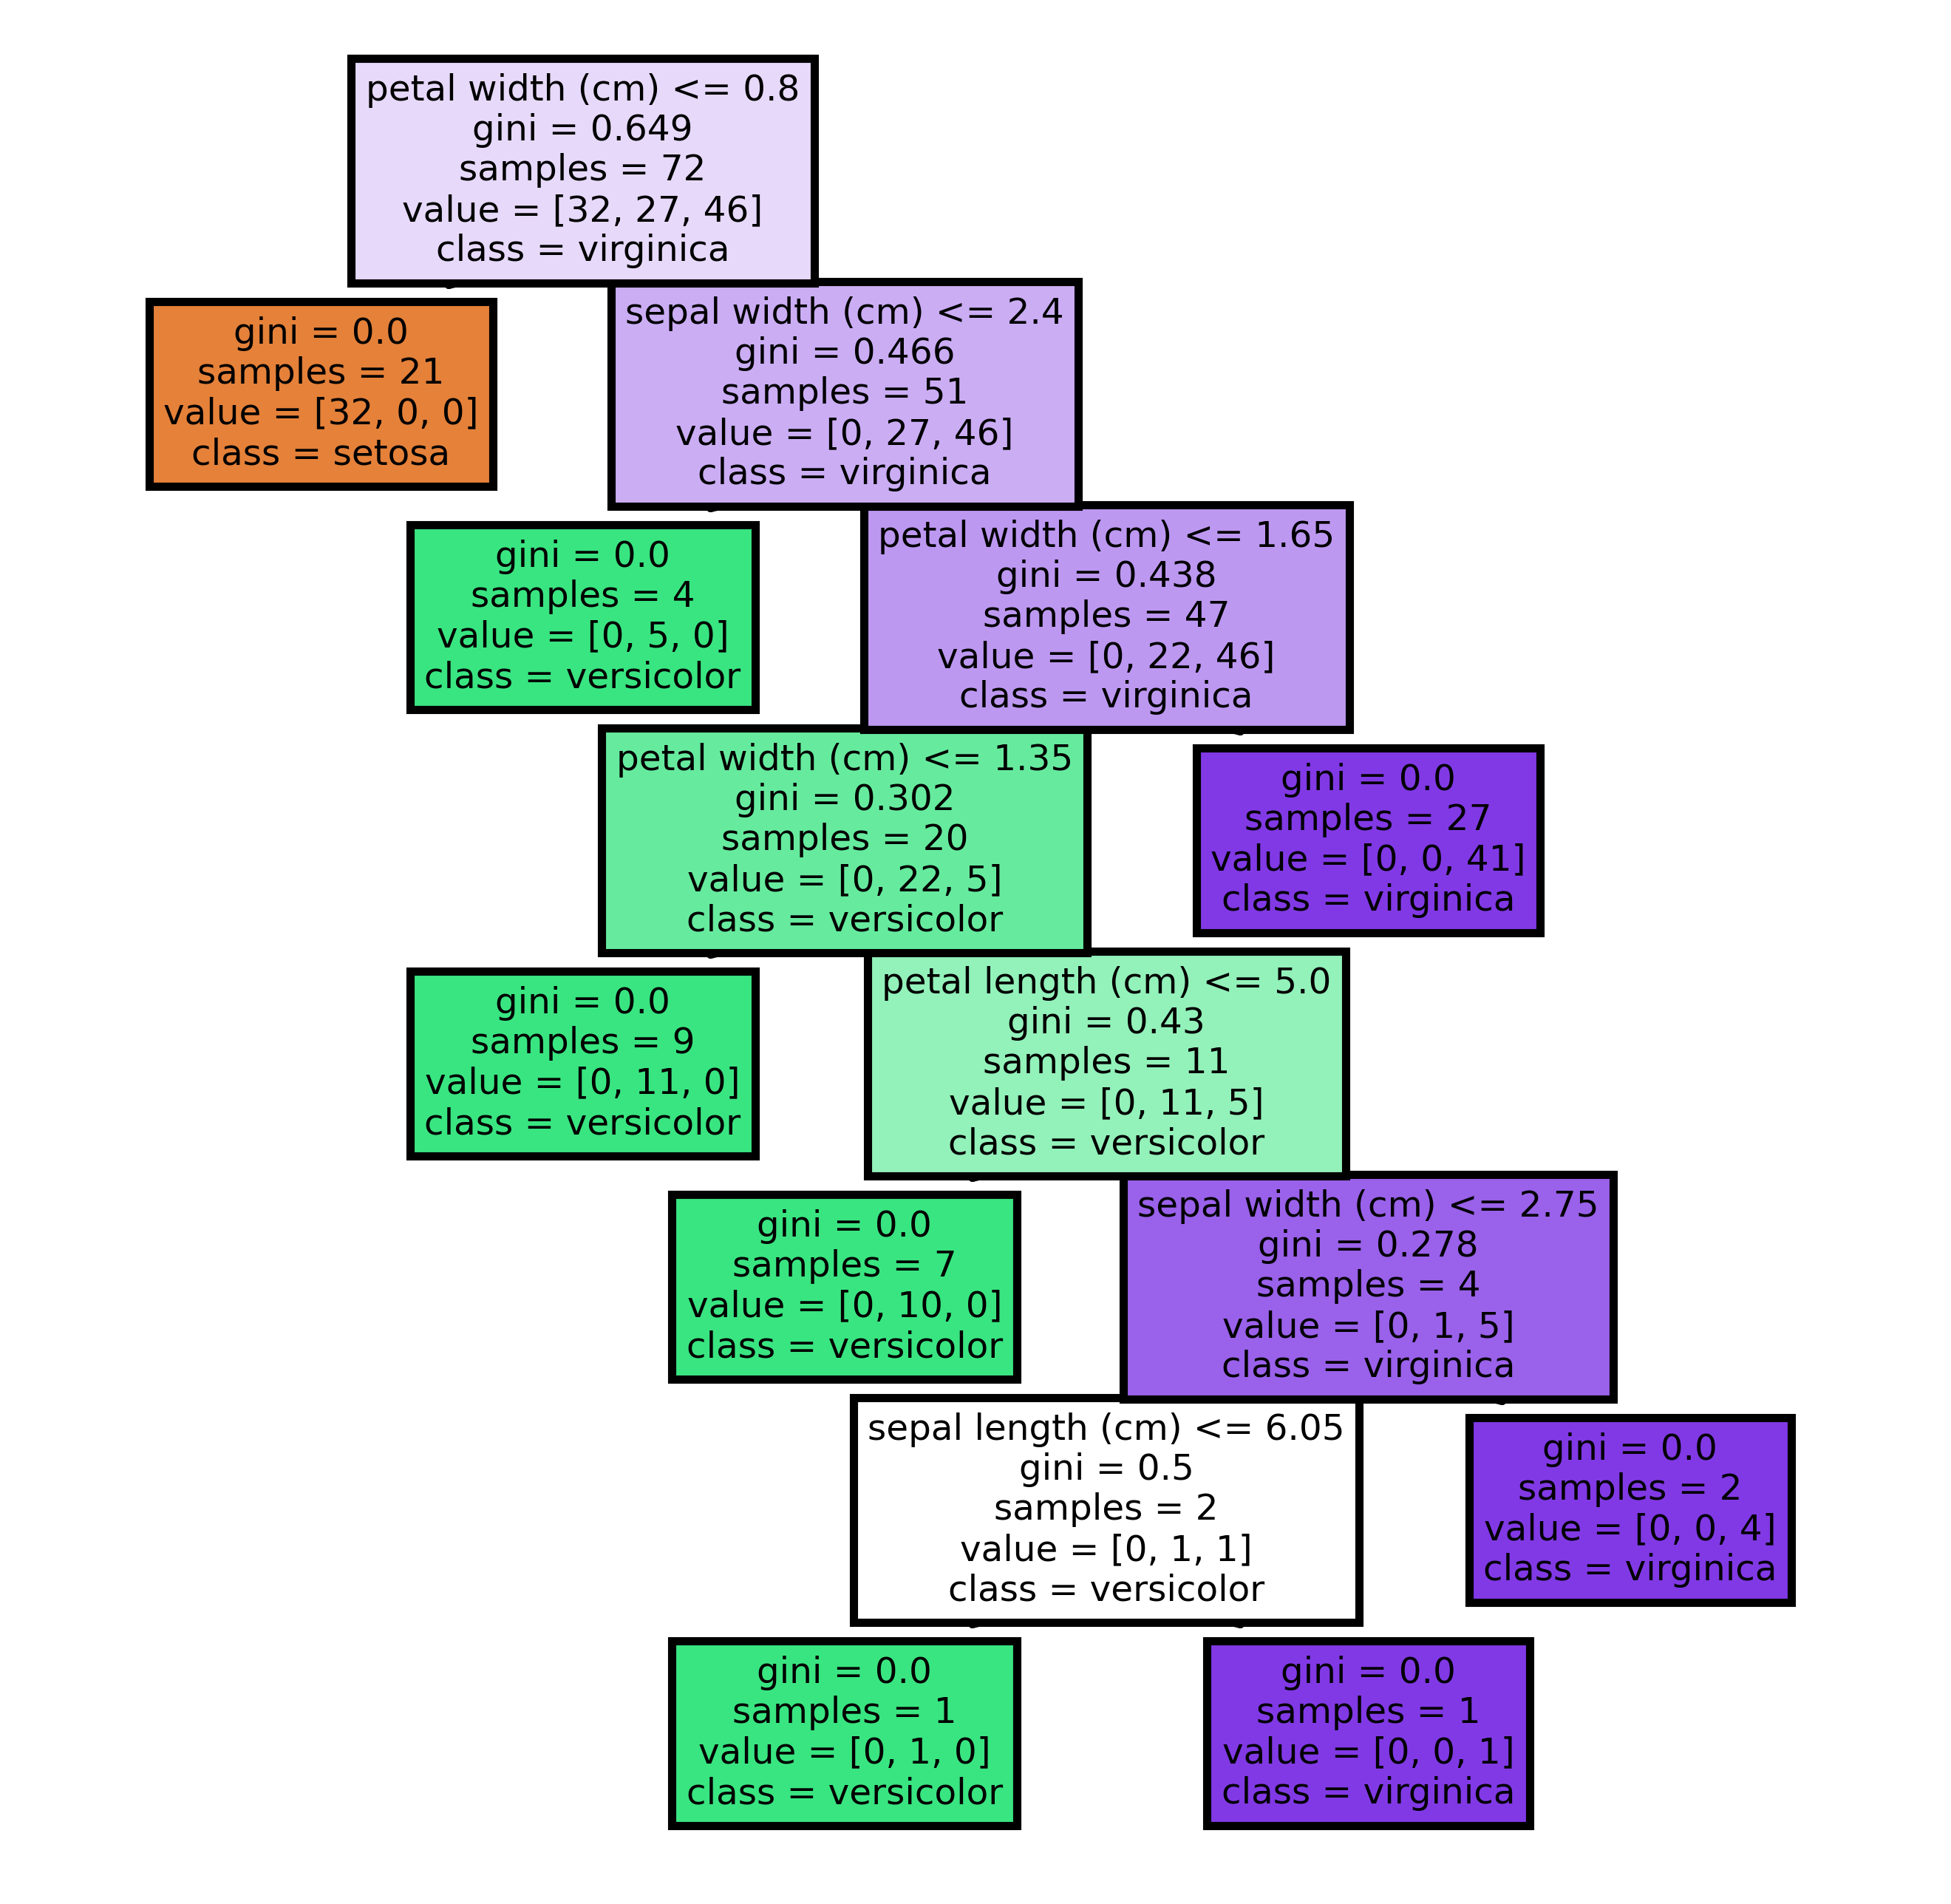

In [9]:
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

import random
r1 = random.randint(0, 20)


tree.plot_tree(rf.estimators_[r1],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

In [10]:
y_predict = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9777777777777777

#### We observe an increased accuracy since Random Forest Classifier constructs several tree architectures and merges them to obtain the best results

### Task 4 complete